# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


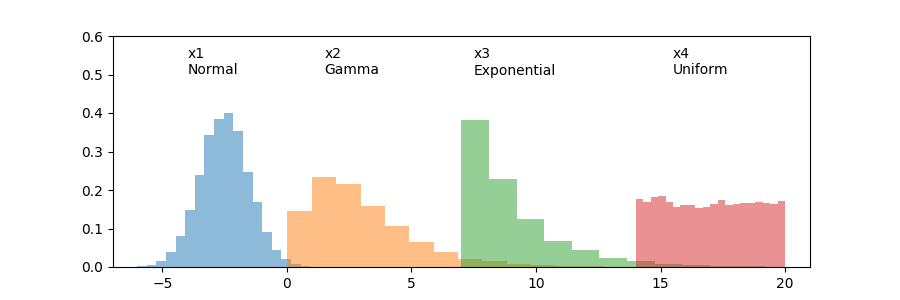

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, normed=True, bins=20, alpha=0.5)
plt.hist(x2, normed=True, bins=20, alpha=0.5)
plt.hist(x3, normed=True, bins=20, alpha=0.5)
plt.hist(x4, normed=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

### SUBPLOTS

<IPython.core.display.Javascript object>


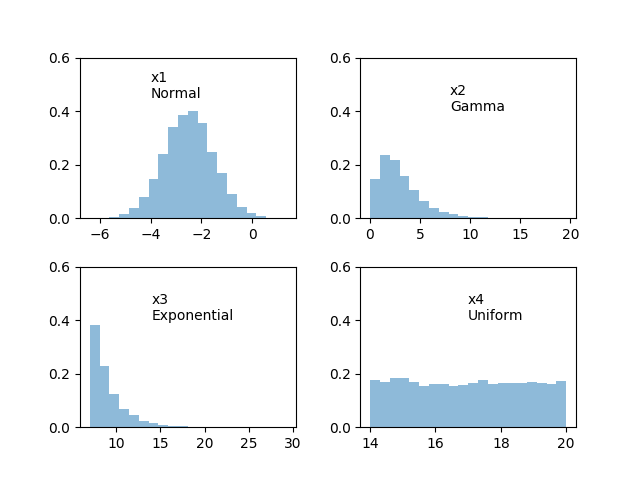

In [2]:
plt.figure()
# subplot with 2 row, 2 columns, and current axis is 1st subplot axes
ax1=plt.subplot(2, 2, 1)

ax1.hist(x1, normed=True, bins=20, alpha=0.5)
ax1.text(x1.mean()-1.5, 0.45, 'x1\nNormal')

ax2=plt.subplot(2, 2, 2, sharey=ax1)
ax2.hist(x2, normed=True, bins=20, alpha=0.5)
ax2.text(x2.mean()+5, 0.4, 'x2\nGamma')

ax3=plt.subplot(2, 2, 3)
ax3.hist(x3, normed=True, bins=20, alpha=0.5)
ax3.text(x3.mean()+5, 0.4, 'x3\nExponential')

ax4=plt.subplot(2, 2, 4)
ax4.hist(x4, normed=True, bins=20, alpha=0.5)
ax4.text(x4.mean(), 0.4, 'x4\nUniform')

for ax in [ax1,ax2,ax3,ax4]:
    ax.set_ylim(0,0.6)
    
plt.subplots_adjust(wspace=0.3,hspace=0.3)

### SUBPLOTS version 2

<IPython.core.display.Javascript object>


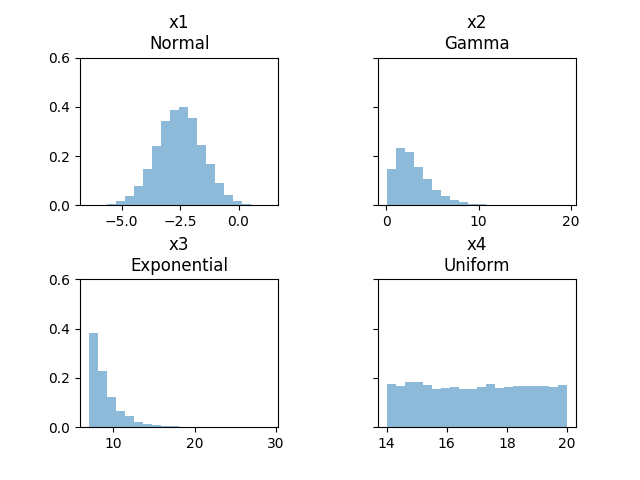

In [3]:
# create a 2x2 grid of subplots
fig, ((ax1,ax2), (ax3,ax4,)) = plt.subplots(2, 2, sharex=False, sharey=True)

# histo on the 1st subplot axes 
ax1.hist(x1, normed=True, bins=20, alpha=0.5)
ax1.set_title('x1\nNormal')
ax1.set_ylim(0,0.6)

ax2.hist(x2, normed=True, bins=20, alpha=0.5)
ax2.set_title('x2\nGamma')

ax3.hist(x3, normed=True, bins=20, alpha=0.5)
ax3.set_title('x3\nExponential')

ax4.hist(x4, normed=True, bins=20, alpha=0.5)
ax4.set_title('x4\nUniform')

#$ax.update(wspace=0.5, hspace=0.5)

plt.subplots_adjust(wspace=0.5,hspace=0.5)

### gridspec

<IPython.core.display.Javascript object>


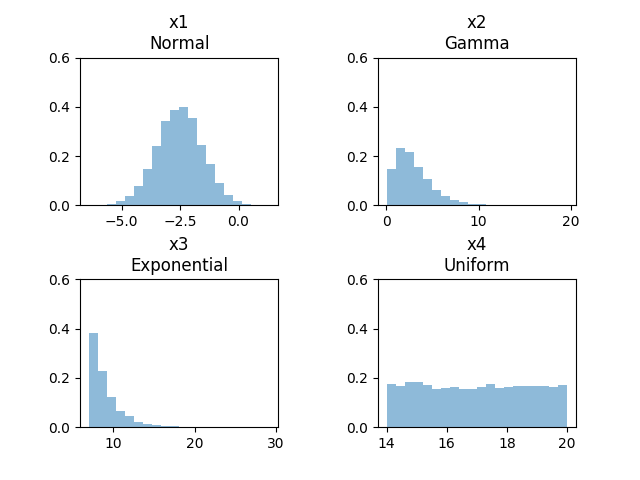

In [4]:
# use gridspec to partition the figure into subplots
import matplotlib.gridspec as gridspec

plt.figure()
gspec = gridspec.GridSpec(2, 2)

top_left = plt.subplot(gspec[0, 0])
top_right = plt.subplot(gspec[0, 1])
lower_left = plt.subplot(gspec[1, 0])
lower_right = plt.subplot(gspec[1, 1])


top_left.hist(x1, normed=True, bins=20, alpha=0.5)
top_right.hist(x2, normed=True, bins=20, alpha=0.5)
lower_left.hist(x3, normed=True, bins=20, alpha=0.5)
lower_right.hist(x4, normed=True, bins=20, alpha=0.5)

top_left.set_title('x1\nNormal')
top_right.set_title('x2\nGamma')
lower_left.set_title('x3\nExponential')
lower_right.set_title('x4\nUniform')

# change axes limits
for ax in [top_left, top_right, lower_left, lower_right]:
    #ax.set_xlim(-7,21)
    ax.set_ylim(0,0.6)
    
plt.subplots_adjust(wspace=0.5,hspace=0.5)

### ANIMATIONS!

In [91]:
import matplotlib.animation as animation
import math
from IPython import display

x1: max=-0.82  and min=-3.98
x2: max=4.74  and min=0.37
x3: max=11.54  and min=7.06
x4: max=18.60  and min=14.63


<IPython.core.display.Javascript object>


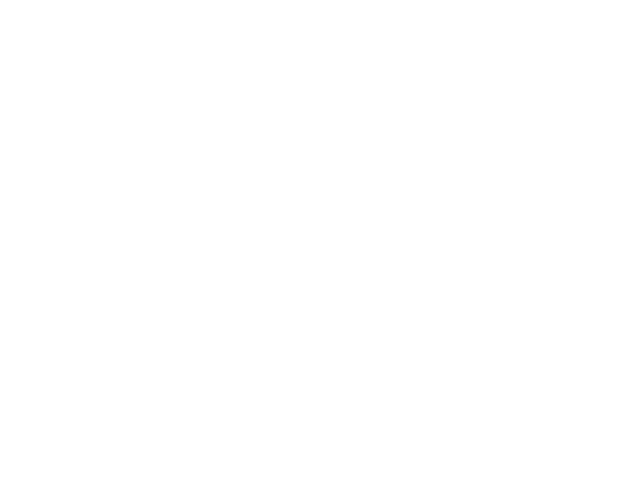

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6198: RuntimeWarning: invalid value encountered in true_divide
  m = (m.astype(float) / db) / m.sum()


In [134]:
n = 10
x1 = np.random.normal(-2.5, 1, n)
x2 = np.random.gamma(2, 1.5, n)
x3 = np.random.exponential(2, n)+7
x4 = np.random.uniform(14,20, n)

print('x1: max={:.2f}'.format(np.max(x1)),' and min={:.2f}'.format(np.min(x1)))
print('x2: max={:.2f}'.format(np.max(x2)),' and min={:.2f}'.format(np.min(x2)))
print('x3: max={:.2f}'.format(np.max(x3)),' and min={:.2f}'.format(np.min(x3)))
print('x4: max={:.2f}'.format(np.max(x4)),' and min={:.2f}'.format(np.min(x4)))

#update plot 
def update(curr):

    # stop after n times
    if curr == n: 
        a.event_source.stop()
 
    # initialize some axis info
    for ax in [ax1, ax2, ax3, ax4]:
        ax.cla()
        ax.set_ylabel('Frequency')
        #ax.set_xlabel('Value')
    
    # create histograms
    ax1.hist(x1[:curr], normed=True, bins=20, alpha=0.5)
    ax2.hist(x2[:curr], normed=True, bins=20, alpha=0.5)
    ax3.hist(x3[:curr], normed=True, bins=20, alpha=0.5)    
    ax4.hist(x4[:curr], normed=True, bins=20, alpha=0.5)
    
    # Determine range in values for each plot
    ax1.axis([-7.5,2.5,0,1])
    ax4.axis([math.ceil(np.min(x2)),math.ceil(np.max(x2)),0,1])
    ax3.axis([math.ceil(np.min(x3)),math.ceil(np.max(x3)),0,1])
    ax4.axis([math.ceil(np.min(x4)),math.ceil(np.max(x4)),0,1])
    
    # set titles
    fig.suptitle('Sampling Distributions\nn={}'.format(curr), fontsize=15)
    ax1.set_title('X1: Normal')
    ax2.set_title('X2: Gamma')
    ax3.set_title('X3: Exponential')
    ax4.set_title('X4: Uniform')

# create a 2x2 grid of subplots
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2, 2, sharey=True)
fig.subplots_adjust(wspace=0.5,hspace=0.5,top=0.85)
a = animation.FuncAnimation(fig, update, interval=100)

# saving to m4 using ffmpeg writer
writervideo = animation.FFMpegWriter(fps=60)
a.save('sampling_distr.mp4', writer=writervideo)
plt.close()

In [132]:
plt.close()